In [1]:
### Let's read a sample audio using librosa
import librosa
audio_file_path='../UrbanSound8K/audio/fold1/7061-6-0-0.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [2]:
## Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
## n_mfcc
print(mfccs.shape)

(40, 97)


In [3]:
mfccs

array([[-1.27213120e+02,  8.04792309e+00,  1.60044117e+01, ...,
        -5.69353333e+02, -5.91727539e+02, -6.10657837e+02],
       [ 3.00206680e+01,  2.29403477e+01,  1.06696825e+01, ...,
         4.30511932e+01,  2.58880424e+01,  1.28297863e+01],
       [-2.53601742e+00, -1.12524357e+01, -1.42598038e+01, ...,
        -1.11037216e+01, -7.55062675e+00,  2.01516241e-01],
       ...,
       [ 3.23359013e-01, -3.54810309e+00, -5.02934265e+00, ...,
         2.40957856e+00,  3.16997337e+00, -2.12704360e-01],
       [-9.78005695e+00, -9.09051323e+00, -6.19126558e+00, ...,
        -5.01989722e-02,  7.28950620e-01, -9.00552392e-01],
       [ 1.65660703e+00,  1.82233298e+00,  2.83062148e+00, ...,
        -2.06092095e+00, -2.23126650e+00, -1.77458656e+00]], dtype=float32)

In [4]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='../UrbanSound8K/audio/'
metadata=pd.read_csv('../UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [5]:
import numpy as np
def features_extractor(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40, n_fft=1024)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

___

## Spectrograms

Some notes about Spectograms:

1. They are generated using the Fourier Transform; 
    - Moreover using the Short-Fourier Transform since we define a frame(window) and compute the fourier transform on each segment;In this way, the Spectogram encoded also the information about how the frequency components change over time
2. Which are the output of the Fourier transform?
    - the result is a set of complex numbers for each frequency component: a  real part and a imaginary part;
        1. Real part: Represents the in-phase (cosine) component of the frequency.
        2. Imaginary part: Represents the out-of-phase (sine) component of the frequency.
    - We can use those to compute the Magnitude (shows how strongly that specific frequency is present in the signal);
    - The magnitude reflects how much the signal resembles a sinusoid (cosine and sine combined) at frequency k. A higher magnitude means the signal has a stronger presence of that frequency.
3. Basically the obtained magnitudes for each frame and frequencies are grouped and they generated a frequency vector

-------

# Power Spectrum vs Spectrograms:

1. Understanding the Power Spectrum:
    - Physical Meaning: The power spectrum shows where the energy of the signal is concentrated in the frequency domain. Peaks in the power spectrum indicate dominant frequencies that contribute most to the signal's overall behavior.
    - Applications: It is widely used in signal processing to analyze the frequency content of signals, identify periodic components, detect noise, and much more. In speech processing, for instance, the power spectrum helps identify formants and other key features of the speech signal.
2. A spectrogram is a time-frequency representation that shows how the power spectrum of a signal evolves over time. It provides a 3D view (usually represented in 2D) of how signal power varies with both frequency and time. It is widely used in speech processing, music analysis, sonar, and any application where it's essential to understand how signal properties change over time.

## Key Differences Summarized:
- Temporal Dimension:
    1. Power Spectrum: Single snapshot; no time information.
    2. Spectrogram: Time-varying; shows changes in frequencies over time.
- Visualization:
    1. Power Spectrum: 2D plot of frequency vs. power.
    2. Spectrogram: 2D image or heatmap showing frequency, time, and power intensity.
- Information Provided:
    1. Power Spectrum: Only shows which frequencies are present, not when they occur.
    2. Spectrogram: Shows when and how specific frequencies occur and change.
- Application Context:
    1. Power Spectrum: Useful for analyzing steady-state signals or individual frames.
    2. Spectrogram: Essential for dynamic signals, like speech, music, and complex time-varying sounds.

-------------------------

# Log Spectrum:
- Summary:
    1. The log spectrum is used because it aligns the power spectrum with human perception, compresses dynamic range, improves feature extraction, stabilizes variances, and reduces noise impacts.
    2. This transformation is crucial for making the data more manageable, interpretable, and suitable for subsequent analysis, particularly in speech and audio processing tasks.

---------------------------

# What happens when I apply an INVERSE FOURIER TRANSFORM TO THE LOG SPECTRUM?

1. What are Formants?
    - Formants are the resonant frequencies of the vocal tract that shape the sound produced during speech. They are the prominent frequency bands that are amplified by the vocal tract’s resonating cavities 

2. In the frequency domain, formants appear as peaks in the power spectrum. These peaks correspond to the resonant frequencies of the vocal tract.

3. To capture formants and other spectral characteristics, the power spectrum is transformed to the Mel scale (which approximates human hearing) and then log-transformed.

4. After applying the inverse transform we obtain the cepstrum; The cepstrum analysis can reveal both the harmonic structure and the spectral envelope. Peaks in the cepstrum correspond to periodic structures in the frequency domain, including harmonic components.
    - Cepstral Domain: The cepstral domain (or quefrency domain) represents a time-like domain where periodic structures in the frequency domain are analyzed.
    - to understand the meaning:
        1. Harmonics: 
            1. Harmonics are integer multiples of a fundamental frequency. In the power spectrum, harmonics appear as distinct peaks at regular intervals.
            2. When converted to the cepstral domain, these regular intervals show up as short quefrency peaks because the cepstrum captures the periodicity of these harmonics.
        2. Spectral Envelope:
            1. The spectral envelope represents the smooth, broad shape of the power spectrum, filtering out the fine details and focusing on the overall shape.
            2. In the cepstrum, the spectral envelope is represented by long quefrency peaks because they capture the smooth, gradual changes in the spectrum.
            3. in speech processing, formants (resonant frequencies of the vocal tract) are captured as long quefrency peaks. They represent the broader characteristics of the vocal tract’s spectral shaping.
        3. to sum up:
            1. Short Quefrency Peaks: Indicate high-frequency periodicities, where the distance between peaks (quefrency) is small, reflecting fine details or closely spaced harmonics in the frequency domain.
            2. Long Quefrency Peaks: Indicate low-frequency periodicities, where the distance between peaks is larger, reflecting broader features or slowly varying components in the frequency domain.

Often, low filtering is used to remove the high frequencies periodicities and keep the the coefficients for the low frequencies

--------------------------------

Mel Spectrums are used for filtering the Log Amplitude Spectrum

------

# Cepstrum vs Cepstral 
1. the cepstrum is a representation of a signal obtained by taking the inverse Fourier Transform of the logarithm of the power spectrum of that signal. The output of the cepstrum is a sequence or a plot, often resembling a time-like domain called the quefrency domain, which reveals periodicities present in the frequency domain.
    1. ### What is CEPSTRUM?
        C(x(t))  = F^-1( log( F(x(t)) ) )

        where:
        - F is the discrete Fourier transform
        - log is used to get the Log Spectrum
        - F^-1 is the inverse Fourier transform

        ***Basically, we are computing the Spectrum of a Spectrum***

2. Cepstral refers to anything derived from or related to the cepstrum. It is an adjective describing features, coefficients, or methods that utilize cepstral analysis.

# Mel-Frequency Cepstral Coefficients MFCC

### Where is used?
    - Speech processing (recognition/identification)
    - Music processing 

Steps:
1. Waveform
2. DFT (DISCRETE FOURIER TRANSFORM)
3. Log-Amplitude Spectrum 
4. Mel-Scaling
5. Discrete Cosine Transform (better than inverse DFT since it returns real valued coefficients and other reasons)
6. Output: MFCC (the higher the coefficients the better the given cosine fits the log signal)

### MFCC coefficients:
- usually, we take the 12 or 13 first coeffieincets, since they have info about the formants and spectral envelope(for speech recognition);
- it's possilbe to focus on the DELTA MFCC and obtain 39 coefficients;
- it's possible to visualize the MFCC as a spectrogram over time using the idea of the frame;



In [6]:
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

0it [00:00, ?it/s]

8732it [06:45, 21.55it/s]


In [13]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-302.21152, 69.556465, -124.388756, -50.66137...",dog_bark
1,"[-497.49588, 108.53252, -52.183617, 60.615326,...",children_playing
2,"[-531.8105, 120.17569, -46.226433, 51.953545, ...",children_playing
3,"[-488.22928, 102.17729, -34.552525, 53.13046, ...",children_playing
4,"[-519.3341, 112.80471, -52.25847, 60.23233, 2....",children_playing


In [14]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [15]:
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [42]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

# Model

In [43]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [44]:
### No of classes
num_labels=y.shape[1]

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.2))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.1))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [84]:
model.summary()
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 100)            │         4,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_36 (Activation)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 200)            │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_37 (Activation)      │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_38 (Activation)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_39 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,410 (177.38 KB)

 Trainable params: 45,410 (177.38 KB)

 Non-trainable params: 0 (0.00 B)

In [85]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.keras', 
                               verbose=1, save_best_only=True)
start = datetime.now()

history = model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100


211/219 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - accuracy: 0.1644 - loss: 8.6329
Epoch 1: val_loss improved from inf to 1.95268, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1657 - loss: 8.4574 - val_accuracy: 0.2811 - val_loss: 1.9527
Epoch 2/100
198/219 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - accuracy: 0.2596 - loss: 2.0714
Epoch 2: val_loss improved from 1.95268 to 1.72552, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - accuracy: 0.2617 - loss: 2.0634 - val_accuracy: 0.3784 - val_loss: 1.7255
Epoch 3/100
209/219 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - accuracy: 0.3344 - loss: 1.8302
Epoch 3: val_loss improved from 1.72552 to 1.57011, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3348 - loss: 1.8288 - val_accuracy: 0.4453 - val_loss: 1.5701
Epoch 4/100
147/219 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - accuracy: 0.387

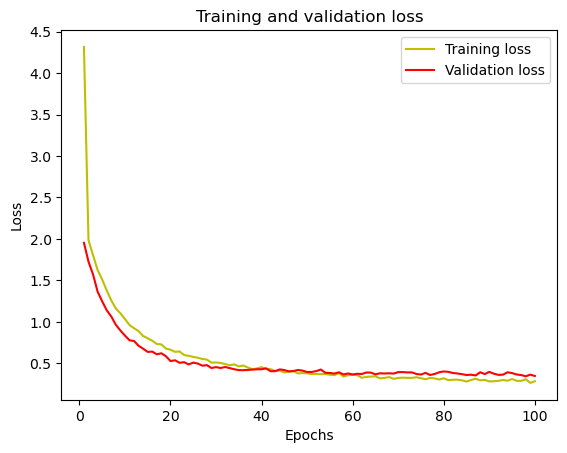

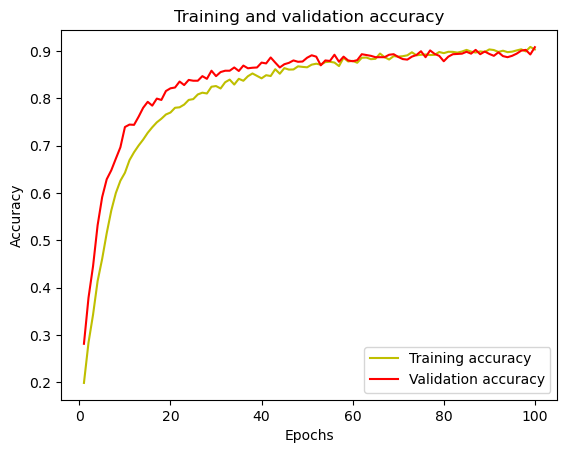

In [86]:
import matplotlib.pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
#acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
#val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [87]:
from keras.models import load_model
model = load_model('../Audio_Classification/saved_models/audio_classification.keras')

In [88]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.9026903510093689
